<center>
    <h2><b> Análise de dados utilizando <i>Natural language processing</i> (NLP)</b></h2>
    ✦ <i>Thaís Marins</i> ✦
</center>

______________________________________________________________________________________________________________________________________________________

**Perguntas Guias:**

* Quais palavras mais frequentes?
* Existem tipos ou classificações de avaliações?
* Existem frequências de palavras diferentes para tipos diferentes de avaliações?
* Conseguimos tirar alguma conclusão de um histograma?
* Conseguimos tirar alfuma conclusõa de uma nuvem de palavras?
* O que mais poderíamos fazer?
* Quais conclusões posso tirar dessas avaliações?

______________________________________________________________________________________________________________________________________________________

### Importação de bibliotecas utilizadas:

In [49]:
#Instalação de biblioteca para identificar o idioma
%pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [50]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [51]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

# usaremos o regex para limpar o texto
import re

#biblioteca para identificar os idiomas
from langdetect import detect

import pandas as pd
import matplotlib.pyplot as plt


In [52]:
#Caminho para a base de dados
caminho = "avaliacoes_am.txt"
caminho

'avaliacoes_am.txt'

In [53]:
#Abrindo o arquivo .txt
with open(caminho, encoding="utf8") as arquivo:
    avaliacoes = arquivo.read()
    print(avaliacoes)

Avaliações
"""Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carregame

In [54]:
# dividindo a string em uma lista das avaliações e utilizando o ";" como separador das avaliações
lista_avaliacoes = avaliacoes.split(';')
lista_avaliacoes

['Avaliações\n"""Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carreg

In [55]:
#Excluindo a ultima avaliação que é apenas uma quebra de linha \n
lista_avaliacoes.pop()
lista_avaliacoes

['Avaliações\n"""Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carreg

In [56]:
#Quantidade de avaliações
len(lista_avaliacoes)

10042

In [57]:
#Avaliação antes do pré-processamento
lista_avaliacoes[22]

'"""\n"""Fico sempre com o pé atrás quando vou comprar produtos da Xiaomi sem ser na loja oficial pois já existem muitas imitações no mercado. Porém já é o segundo celular que compro do vendedor (GREAT DEAL OFFICIAL) e os dois são originais, inclusive verifiquei o IMEI no site oficial da XIAOMI e os dois foram aprovados.'

______________________________________________________________________________________________________________________________________________________

## **Pré-processamento do texto utilizando *regex***

In [58]:
def pre_processamento(texto):
    texto_sem_aspas = re.sub(r'^"\n"|^"+|\n"+', '', texto)

    return texto_sem_aspas

In [59]:
#Avaliação depois do pré-processamento
pre_processamento(lista_avaliacoes[22])

'Fico sempre com o pé atrás quando vou comprar produtos da Xiaomi sem ser na loja oficial pois já existem muitas imitações no mercado. Porém já é o segundo celular que compro do vendedor (GREAT DEAL OFFICIAL) e os dois são originais, inclusive verifiquei o IMEI no site oficial da XIAOMI e os dois foram aprovados.'

In [60]:
#Salvando as avaliações pré-processadas
#%%time
avaliacoes_pp = [pre_processamento(texto_lista) for texto_lista in lista_avaliacoes]
avaliacoes_pp

['AvaliaçõesCom a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carregament

______________________________________________________________________________________________________________________________________________________

### **Métricas Estatísticas**

In [61]:
#Quantidade de avaliações pré-processadas
total_av = len(avaliacoes_pp)
print(f"A quantidade de avaliações pré-processadas na base de dados fornecida é: {total_av}\n")
#len(avaliacoes_pp[31])
#print(avaliacoes_pp[31])

A quantidade de avaliações pré-processadas na base de dados fornecida é: 10042



In [62]:
#Qual a maior avaliação presente na base de dados
max_av = max([len(texto) for texto in avaliacoes_pp])
print(f"Número de caracteres da maior avaliação: {max_av}")
#max(avaliacoes_pp)
#min(avaliacoes_pp)

Número de caracteres da maior avaliação: 9134


In [63]:
max_length = max([len(texto) for texto in avaliacoes_pp])
indice_max = [i for i, texto in enumerate(avaliacoes_pp) if len(texto) == max_length]
for i in indice_max:
  print("Maior avaliação (por número de caracteres):", avaliacoes_pp[i])

Maior avaliação (por número de caracteres): Impressions after 1 week. May update if something goes wrong later, otherwise see you in a few years.----------------------------------------------------------------------My hands measure 18 x 10 cm and I use a palm grip. Length is measured from tip of middle finger to base of palm, and width is measured from edge of pinky to edge of thumb when all fingers are placed together.I've mained 4 mice over the years, including this one. M65 RGB, M65 RGB Elite, Razer Basilisk x Hyperspeed, and this Corsair Nightsword. The original M65 RGB was a real tank that lasted me 5+ years of hard usage. The switches are still 100% responsive, but I ruined the surface coat with acetone so I upgraded to the Elite. The M65 Elite started losing responsiveness in the left click after 4 months. The Basilisk x Hyperspeed was meant to be my wireless mouse while commuting. It felt decently comfortable in store and the shape was very well done except for a slightly-off h

In [64]:
#Qual a menor avaliação presente na base de dados
min_av = min([len(texto) for texto in avaliacoes_pp])
print(f"Número de caracteres da menor avaliação: {min_av}")


Número de caracteres da menor avaliação: 1


In [65]:
count = 0
min_length = min([len(texto) for texto in avaliacoes_pp])
indice_min = [i for i, texto in enumerate(avaliacoes_pp) if len(texto) == min_length]
for i in indice_min:
  print("Menor avaliação (por número de caracteres):", avaliacoes_pp[i])
  count +=1

print(count)

Menor avaliação (por número de caracteres): .
Menor avaliação (por número de caracteres): .
Menor avaliação (por número de caracteres): .
Menor avaliação (por número de caracteres): .
Menor avaliação (por número de caracteres): É
Menor avaliação (por número de caracteres): 💕
Menor avaliação (por número de caracteres): f
Menor avaliação (por número de caracteres): (
Menor avaliação (por número de caracteres): 😍
Menor avaliação (por número de caracteres): D
Menor avaliação (por número de caracteres): 👍
Menor avaliação (por número de caracteres): D
Menor avaliação (por número de caracteres): D
Menor avaliação (por número de caracteres): .
Menor avaliação (por número de caracteres): …
15


In [66]:
#Qual a média de caracteres por avaliação presente na base de dados
media_av = sum([len(texto) for texto in avaliacoes_pp])/len(avaliacoes_pp)
media_av = round(media_av, 2)
print(f"Número médio de caracteres nas avaliações: {media_av}")


Número médio de caracteres nas avaliações: 190.94


In [67]:
#Comprimento mediano das avaliações:
mediana_av = sorted([len(texto) for texto in avaliacoes_pp])[len(avaliacoes_pp)//2]
print(f"Comprimento mediano das avaliações: {mediana_av}")

Comprimento mediano das avaliações: 86


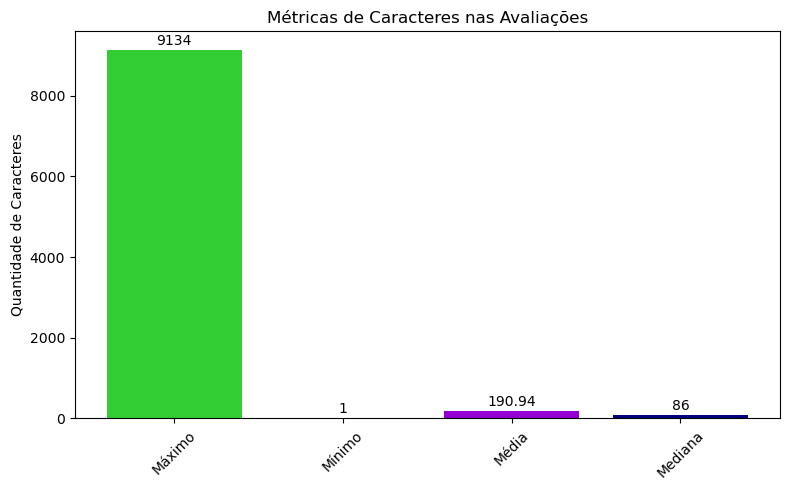

In [68]:
# Listas com os nomes das métricas e seus valores correspondentes
metricas = ['Máximo', 'Mínimo', 'Média', 'Mediana']
valores = [max_av, min_av, media_av, mediana_av]

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(metricas, valores, color=['limegreen', 'red', 'darkviolet', 'navy'])
plt.title('Métricas de Caracteres nas Avaliações')
plt.ylabel('Quantidade de Caracteres')
plt.xticks(rotation=45)

# Adicionar os valores acima das barras
for i, v in enumerate(valores):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

______________________________________________________________________________________________________________________________________________________

### **NLP**

Para garantir que não há dados duplicados, transformamos todos as avaliações para minuscula e criamos um conjunto *set()* para garantir a unicidade das avaliações

In [69]:
conjunto_avaliacoes = set(texto.lower() for texto in avaliacoes_pp)
len(conjunto_avaliacoes)

7797

In [70]:
type(conjunto_avaliacoes)

set

In [71]:
avaliacoes_sd = list(conjunto_avaliacoes)
type(avaliacoes_sd)

list

In [72]:
len(avaliacoes_sd)

7797

## **Métricas sem duplicadas**

In [73]:
#Qual a maior avaliação presente na base de dados
max_av_sd = max([len(texto) for texto in avaliacoes_sd])
print(f"Número de caracteres da maior avaliação: {max_av_sd}")

min_av_sd = min([len(texto) for texto in avaliacoes_sd])
print(f"Número de caracteres da menor avaliação: {min_av_sd}")

media_av_sd = sum([len(texto) for texto in avaliacoes_pp])/len(avaliacoes_sd)
media_av_sd = round(media_av, 2)
print(f"Número médio de caracteres nas avaliações: {media_av_sd}")

mediana_av_sd = sorted([len(texto) for texto in avaliacoes_sd])[len(avaliacoes_sd)//2]
print(f"Comprimento mediano das avaliações: {mediana_av_sd}")

Número de caracteres da maior avaliação: 9134
Número de caracteres da menor avaliação: 1
Número médio de caracteres nas avaliações: 190.94
Comprimento mediano das avaliações: 91


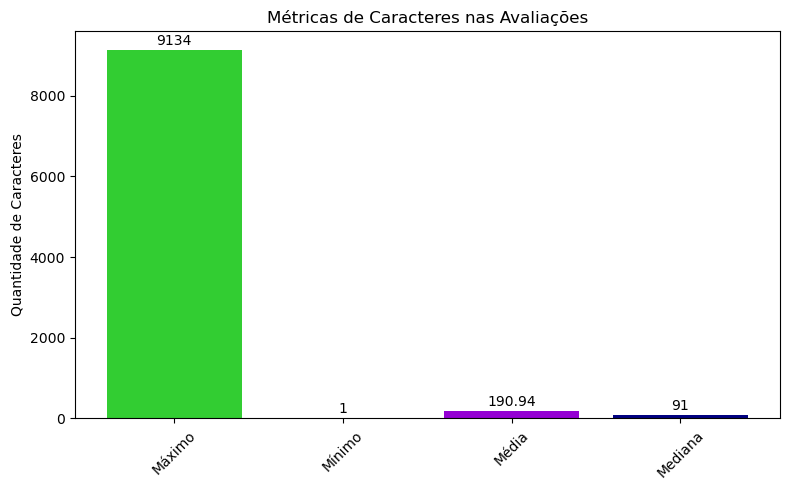

In [74]:
# Listas com os nomes das métricas e seus valores correspondentes
metricas = ['Máximo', 'Mínimo', 'Média', 'Mediana']
valores = [max_av_sd, min_av_sd, media_av_sd, mediana_av_sd]

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(metricas, valores, color=['limegreen', 'red', 'darkviolet', 'navy'])
plt.title('Métricas de Caracteres nas Avaliações')
plt.ylabel('Quantidade de Caracteres')
plt.xticks(rotation=45)

# Adicionar os valores acima das barras
for i, v in enumerate(valores):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Como foi observado, na base de dados há avaliações de diferentes idiomas. O objetivo do primeiro passo é compreender se o número de avaliações estrangeiras são significativas

In [75]:
def detectar_idioma(texto):
  try:
    return detect(texto)
  except:
    return 'Desconhecido'

In [76]:
idiomas = [detectar_idioma(avaliacao) for avaliacao in avaliacoes_sd]

In [77]:
df = pd.DataFrame({'Avaliação': avaliacoes_sd, 'Idioma Detectado': idiomas})
df

Avaliação Idioma Detectado
0     tv box da intelbras ,ta de parabéns muito bom ...               pt
1     já tinha tido um modelo deste, mas foi furtado...               pt
2     muito bom o atendimento, parabéns para toda eq...               pt
3     it's a usb mouse with 2 extra buttons on the s...               en
4     gostei muito desse produto, apesar de não usar...               pt
...                                                 ...              ...
7792  produto superou minhas expectativas, muito boa...               pt
7793  sapato super confortável, muita leveza. vale a...               it
7794  ótimo mouse custo beneficio, você senti o conf...               pt
7795  gostei muito do ventilador, não faz muito baru...               pt
7796            gostei muito. produto igual ao anúncio.               pt

[7797 rows x 2 columns]

In [78]:
#frequencia
idiomas_contagem = df['Idioma Detectado'].value_counts()
idiomas_contagem

pt              6972
en               311
es               161
it               144
fr                28
sk                24
ca                23
de                22
ro                20
hu                11
Desconhecido      10
ja                 9
nl                 7
lt                 5
tl                 5
sw                 5
sl                 4
so                 4
af                 4
id                 3
lv                 3
sq                 3
fi                 3
pl                 2
da                 2
no                 2
sv                 2
et                 2
hr                 2
cy                 1
vi                 1
cs                 1
tr                 1
Name: Idioma Detectado, dtype: int64

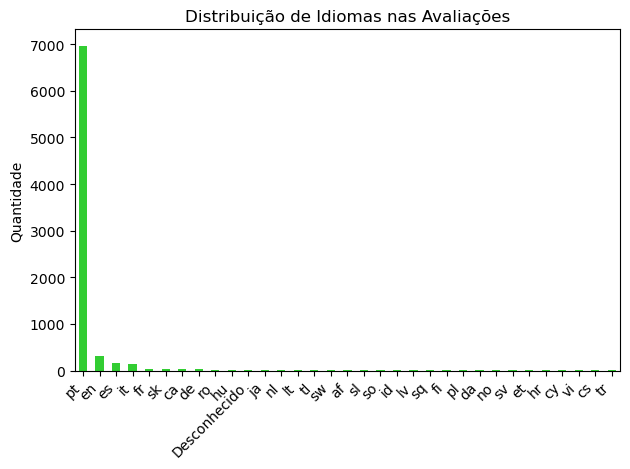

In [79]:
idiomas_contagem = idiomas_contagem.sort_values(ascending=False)

idiomas_contagem.plot(kind='bar', color=['limegreen'])

plt.title('Distribuição de Idiomas nas Avaliações')
#plt.xlabel('Idiomas')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


**Como foi observado a alta frequência de avaliações em Português. Optou-se por tratar os dados em dois grupos:**
 * Avaliações escritas em Português
 * Avaliações escritas em outro idioma

In [80]:
idioma_pt = (df['Idioma Detectado'] == "pt").sum()
print(idioma_pt)

6972


In [81]:
idioma_nao_pt = (df['Idioma Detectado'] != "pt").sum()
print(idioma_nao_pt)

825


In [82]:
print(idioma_pt + idioma_nao_pt)

7797


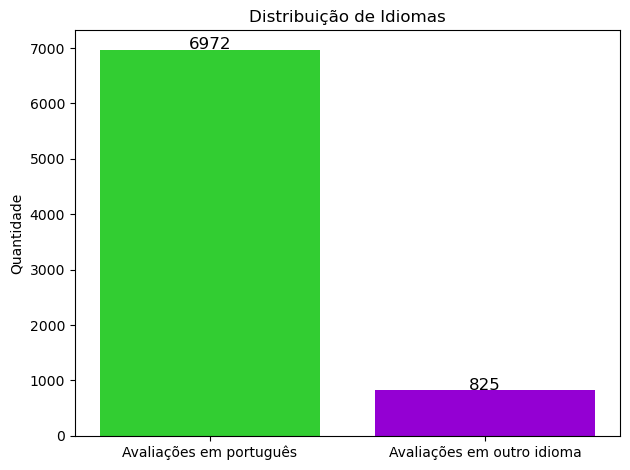

In [83]:
plt.bar(['Avaliações em português', 'Avaliações em outro idioma'], [idioma_pt, idioma_nao_pt], color=['limegreen', 'darkviolet'])
plt.title('Distribuição de Idiomas')
plt.ylabel('Quantidade')

for i, v in enumerate([idioma_pt, idioma_nao_pt]):
    plt.text(i, v-50, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

O que vamos fazer a partir disso?

______________________________________________________________________________________________________________________________________________________

## Stopwords

In [84]:
# fazendo o download das stopwords
nltk.download('stopwords')

# stopwords do portugues
stopwords_pt = stopwords.words('portuguese')
stopwords_pt.append('pra')
#stopwords_pt.remove('não')
stopwords_en = stopwords.words('english')
stopwords_es = stopwords.words('spanish')
stopwords_ge = stopwords.words('german')
stopwords_it = stopwords.words('italian')
print(stopwords_it)
#print('não' in stopwords_pt)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsmartins\AppData\Roaming\nltk_data...


['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal', 'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla', 'dalle', 'di', 'del', 'dello', 'dei', 'degli', 'dell', 'degl', 'della', 'delle', 'in', 'nel', 'nello', 'nei', 'negli', 'nell', 'negl', 'nella', 'nelle', 'su', 'sul', 'sullo', 'sui', 'sugli', 'sull', 'sugl', 'sulla', 'sulle', 'per', 'tra', 'contro', 'io', 'tu', 'lui', 'lei', 'noi', 'voi', 'loro', 'mio', 'mia', 'miei', 'mie', 'tuo', 'tua', 'tuoi', 'tue', 'suo', 'sua', 'suoi', 'sue', 'nostro', 'nostra', 'nostri', 'nostre', 'vostro', 'vostra', 'vostri', 'vostre', 'mi', 'ti', 'ci', 'vi', 'lo', 'la', 'li', 'le', 'gli', 'ne', 'il', 'un', 'uno', 'una', 'ma', 'ed', 'se', 'perché', 'anche', 'come', 'dov', 'dove', 'che', 'chi', 'cui', 'non', 'più', 'quale', 'quanto', 'quanti', 'quanta', 'quante', 'quello', 'quelli', 'quella', 'quelle', 'questo', 'questi', 'questa', 'queste', 'si', 'tutto', 'tutti', 'a', 'c', 'e', 'i', 'l', 'o', 'ho', 'hai', 'ha', 'ab

[nltk_data]   Unzipping corpora\stopwords.zip.


In [85]:
avaliacoes_pt = list(df.loc[df['Idioma Detectado'] == 'pt', 'Avaliação'])
print(avaliacoes_pt)


['tv box da intelbras ,ta de parabéns muito bom de verdade ,e entregaram super bem', 'já tinha tido um modelo deste, mas foi furtado. optei pelo mesmo modelo pois de fato, pra mim, ele é muito bom. gosto do tempo de bateria, pois passo 1 semana sem recarregar a caixinha ( uso cerca de 3h/dia) e sem ela ter descarregado. gosto da possibilidade de ter um aplicativo na jbl onde vc pode configurar alguns comandos no fone. o sistema que permite que ele continue tocando e funcionando com apenas um dos fones no ouvido também é bom, quando vc às vezes quer fazer coisas simultâneas e deixar o outro fone guardado.a caixinha embora seja aberta e vez ou outra precise de um pincel pra tirar o pó, ainda assim deixa os fones bem ajustados sem cair, e não foi um impeditivo pra eu buscar o mesmo modelo. consegui o modelo branco no valor de 241 reais.', 'muito bom o atendimento, parabéns para toda equipe.', 'gostei muito desse produto, apesar de não usar muito o vapor pois eu não gosto muito, deixa as r

In [86]:
avaliacoes_outro_idioma = list(df.loc[df['Idioma Detectado'] != 'pt', 'Avaliação'])
print(avaliacoes_outro_idioma)

["it's a usb mouse with 2 extra buttons on the side (yes, i know it says 5 but that includes scroll wheel, left and right clicks). there's nothing really special about the product and it works fine. the clicking is loud on the mouse and the side buttons are as well. the white light on the mouse is really bright, but the intensity can be changed in the synapse software. i wouldn't purchase it for gaming as there's very little control and extras on this mouse.", 'me gusto la mochila, se ve como en las imágenes, hasta ahora solo la use una vez para un viaje corto y pude guardar lo que necesitaba. me fue útil la bolsa para cosas húmedas, y los diferentes compartimentos para organizar lo demás. es cómoda por la parte de la espalda y los tirantes, aunque fue un día relativamente caluroso no me resulto incomoda de llevar. el material comparándolo con el de otra mochila ligera que uso a diario desde hace dos años es muy similar por lo que, respecto a la durabilidad, auguro que será buena, de i

In [87]:
def remove_stopwords(texto, lista_stopwords):
    lista_palavras = texto.split()
    texto_em_lista_sem_stopwords = [palavra for palavra in lista_palavras if palavra.lower() not in lista_stopwords]
    texto_sem_stopwords = ' '.join(texto_em_lista_sem_stopwords)

    return texto_sem_stopwords

In [88]:
avaliacoes_sd[22]

'bolsa e mochila muito bonitas, será muito útil, espaço bom e bem estilosas.'

In [89]:
remove_stopwords(avaliacoes_sd[22], stopwords_pt)

'bolsa mochila bonitas, útil, espaço bom bem estilosas.'

In [90]:
#Nuvem de palavras em português
avaliacoes_pt_sem_stopwords = [remove_stopwords(texto, stopwords_pt) for texto in avaliacoes_pt]
texto_word_cloud_pt = ' '.join(avaliacoes_pt_sem_stopwords)
wordcloud_pt = WordCloud(max_font_size=100, max_words=100, background_color="black", colormap="Greens",
                        scale=10, width=800, height=400).generate(texto_word_cloud_pt)



In [91]:
todas_avaliacoes = ' '.join(avaliacoes_pt_sem_stopwords).lower()
todas_avaliacoes
avaliacoes_pt_sem_pontuacao = re.sub(r'[^\w\s]', '', todas_avaliacoes)
avaliacoes_pt_sem_pontuacao
palavras = avaliacoes_pt_sem_pontuacao.split()
palavras
contador = Counter(palavras)
contador

Counter({'tv': 296,
         'box': 6,
         'intelbras': 1,
         'ta': 27,
         'parabéns': 63,
         'bom': 1480,
         'verdade': 34,
         'e': 44,
         'entregaram': 7,
         'super': 568,
         'bem': 1838,
         'tido': 5,
         'modelo': 152,
         'deste': 26,
         'furtado': 1,
         'optei': 12,
         'pois': 363,
         'fato': 80,
         'mim': 162,
         'gosto': 78,
         'tempo': 334,
         'bateria': 459,
         'passo': 21,
         '1': 124,
         'semana': 77,
         'recarregar': 11,
         'caixinha': 64,
         'uso': 640,
         'cerca': 28,
         '3hdia': 1,
         'ter': 301,
         'descarregado': 1,
         'possibilidade': 13,
         'aplicativo': 58,
         'jbl': 58,
         'onde': 69,
         'vc': 129,
         'pode': 242,
         'configurar': 53,
         'alguns': 156,
         'comandos': 25,
         'fone': 237,
         'sistema': 80,
         'permite': 4

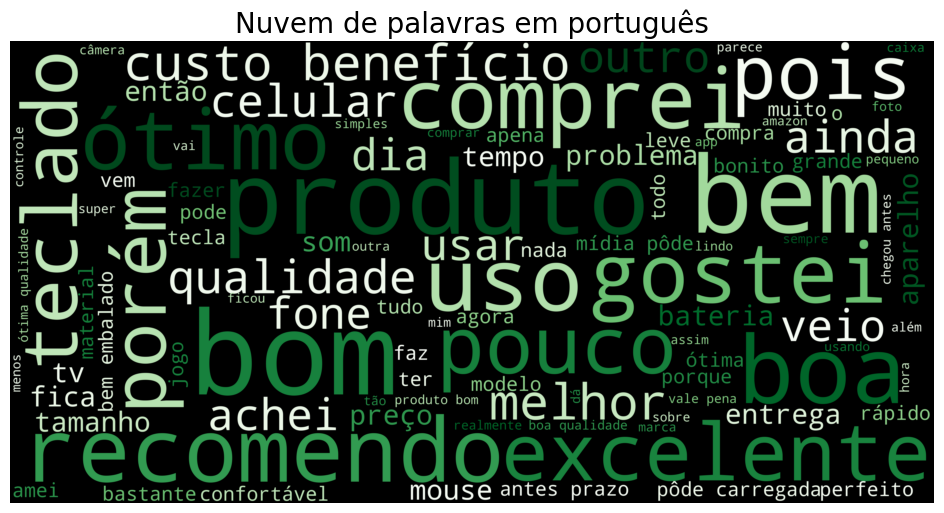

In [92]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pt, interpolation="bilinear")
plt.title('Nuvem de palavras em português', fontsize=20)
plt.axis("off")
plt.show()

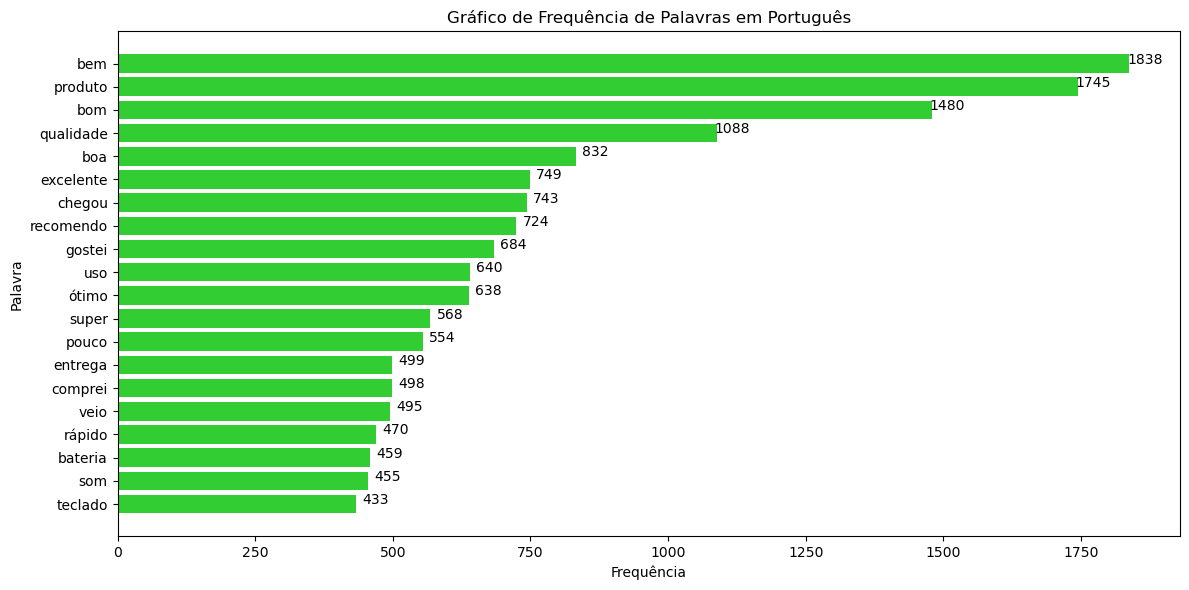

In [93]:
# Grafico de palavras mais frequentes
#todas_palavras_pt = ' '.join(avaliacoes_pt_sem_stopwords).split()
#avaliacoes_pt_sem_pontuacao
todas_palavras_pt = palavras

frequencia_palavras_pt = Counter(todas_palavras_pt)
df_frequencia_palavras_pt = pd.DataFrame(frequencia_palavras_pt.most_common(20), columns=['Palavra', 'Frequência'])
df_frequencia_palavras_pt = df_frequencia_palavras_pt.sort_values(by='Frequência', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(df_frequencia_palavras_pt['Palavra'], df_frequencia_palavras_pt['Frequência'], color='limegreen')
plt.title('Gráfico de Frequência de Palavras em Português')
plt.xlabel('Frequência')
plt.ylabel('Palavra')

for index, value in enumerate(df_frequencia_palavras_pt['Frequência']):
    plt.text(value+60, index, str(value), ha='right')

plt.tight_layout()
plt.show()


In [94]:
df_frequencia_palavras_pt

Palavra  Frequência
19    teclado         433
18        som         455
17    bateria         459
16     rápido         470
15       veio         495
14    comprei         498
13    entrega         499
12      pouco         554
11      super         568
10      ótimo         638
9         uso         640
8      gostei         684
7   recomendo         724
6      chegou         743
5   excelente         749
4         boa         832
3   qualidade        1088
2         bom        1480
1     produto        1745
0         bem        1838

In [95]:
#Nuvem de palavras para outro idioma
#avaliacoes_outro_idioma_sem_stopwords = [remove_stopwords(texto, []) for texto in avaliacoes_outro_idioma]
avaliacoes_outro_idioma_sem_stopwords = [remove_stopwords(texto, stopwords_en) for texto in avaliacoes_outro_idioma]
avaliacoes_outro_idioma_sem_stopwords = [remove_stopwords(texto, stopwords_es) for texto in avaliacoes_outro_idioma_sem_stopwords]
avaliacoes_outro_idioma_sem_stopwords = [remove_stopwords(texto, stopwords_ge) for texto in avaliacoes_outro_idioma_sem_stopwords]
avaliacoes_outro_idioma_sem_stopwords = [remove_stopwords(texto, stopwords_it) for texto in avaliacoes_outro_idioma_sem_stopwords]
texto_word_cloud_outro_idioma = ' '.join(avaliacoes_outro_idioma_sem_stopwords)
wordcloud_outro_idioma = WordCloud(max_font_size=100, max_words=100, background_color="black", colormap="Purples",
                                   scale=10, width=800, height=400).generate(texto_word_cloud_outro_idioma)



In [96]:
todas_avaliacoes = ' '.join(avaliacoes_outro_idioma_sem_stopwords).lower()
todas_avaliacoes
avaliacoes_outro_idioma_sem_pontuacao = re.sub(r'[^\w\s]', '', todas_avaliacoes)
avaliacoes_outro_idioma_sem_pontuacao
palavras_outro_idioma = avaliacoes_outro_idioma_sem_pontuacao.split()
palavras_outro_idioma
contador = Counter(palavras)
contador

Counter({'tv': 296,
         'box': 6,
         'intelbras': 1,
         'ta': 27,
         'parabéns': 63,
         'bom': 1480,
         'verdade': 34,
         'e': 44,
         'entregaram': 7,
         'super': 568,
         'bem': 1838,
         'tido': 5,
         'modelo': 152,
         'deste': 26,
         'furtado': 1,
         'optei': 12,
         'pois': 363,
         'fato': 80,
         'mim': 162,
         'gosto': 78,
         'tempo': 334,
         'bateria': 459,
         'passo': 21,
         '1': 124,
         'semana': 77,
         'recarregar': 11,
         'caixinha': 64,
         'uso': 640,
         'cerca': 28,
         '3hdia': 1,
         'ter': 301,
         'descarregado': 1,
         'possibilidade': 13,
         'aplicativo': 58,
         'jbl': 58,
         'onde': 69,
         'vc': 129,
         'pode': 242,
         'configurar': 53,
         'alguns': 156,
         'comandos': 25,
         'fone': 237,
         'sistema': 80,
         'permite': 4

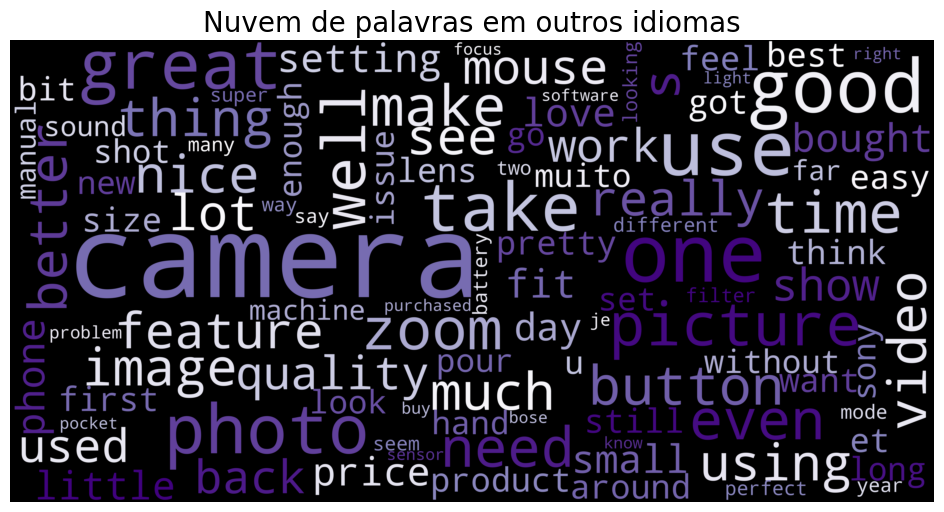

In [97]:
# Plotar a nuvem de palavras para o outro idioma
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_outro_idioma, interpolation="bilinear")
plt.title('Nuvem de palavras em outros idiomas', fontsize=20)
plt.axis("off")
plt.show()

In [99]:
df_frequencia_palavras_outro_idioma

NameError: name 'df_frequencia_palavras_outro_idioma' is not defined

In [ ]:
# Grafico de palavras mais frequentes
todas_palavras_outro_idioma = ' '.join(avaliacoes_outro_idioma_sem_stopwords).split()
todas_palavras_outro_idioma =palavras_outro_idioma

frequencia_palavras_outro_idioma = Counter(todas_palavras_outro_idioma)
df_frequencia_palavras_outro_idioma = pd.DataFrame(frequencia_palavras_outro_idioma.most_common(20), columns=['Palavra', 'Frequência'])
df_frequencia_palavras_outro_idioma = df_frequencia_palavras_outro_idioma.sort_values(by='Frequência', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(df_frequencia_palavras_outro_idioma['Palavra'], df_frequencia_palavras_outro_idioma['Frequência'], color='darkviolet')
plt.title('Gráfico de Frequência de Palavras para Outro Idioma')
plt.xlabel('Frequência')
plt.ylabel('Palavra')

for index, value in enumerate(df_frequencia_palavras_outro_idioma['Frequência']):
    plt.text(value+9, index, str(value), ha='right')

plt.tight_layout()
plt.show()

NameError: name 'avaliacoes_outro_idioma_sem_stopwords' is not defined

In [100]:
tamanhos = [len(avaliacao) for avaliacao in avaliacoes_sd_ss]

plt.hist(tamanhos, bins = 100, color='green', alpha=0.9)
plt.xlabel('Número de Palavras')
plt.ylabel('Número de Avaliações')
plt.title('Distribuição do Número de Palavras nas Avaliações')
plt.show()

NameError: name 'avaliacoes_sd_ss' is not defined